<div dir="rtl">

# <center> به نام خدا </center>

</div>

<div dir="rtl">

# تمرین درس پردازش گفتار

## **استاد:** _دکتر بختیاری_

## **دانشجو:** _محمدعلی زرین زاده_

## **تابستان 1400**

این تمرین با استفاده از `jupyter notebook` پایتون پیاده سازی شده است. هر دو حالت `DTW` و `HMM` انجام شده است.

تمامی داده های مورد استفاده، صورت تمرین و کدها  را می توانید در  [اینجا](https://github.com/MrGolden1/Speech-Processing-Excersice) بیابید.
</div>


<div dir="rtl">

ابتدا کتابخانه ها و ماژول های لازم را فراخوانی میکنیم.
</div>

In [130]:
import librosa
import librosa.display
import soundfile
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from prettytable import PrettyTable
from scipy.signal import get_window
from hmmlearn import hmm
import glob
from audiomentations import Compose, AddGaussianNoise, TimeStretch,ClippingDistortion ,AddBackgroundNoise,Gain,PolarityInversion
%matplotlib inline

<div dir="rtl">

## داده های ما از 4 بخش زیر تشکیل شده است: 

1. ده فایل صوتی نام خانوادگی برای آموزش 

2. سه فایل نام خانوادگی برای تست

3. سه فایل نام خانوادگی با صدای فردی دیگر

4. سه فایل نام 
 
</div>

In [143]:
lastname_train_path = 'lastname_train/'
lastname_test_path = 'lastname_test/'
lastname_another_path = 'lastname_another_person/'
first_name_path = 'firstname/'

<div dir="rtl">

ابتدا هر بخش از داده ها را بارگیری کرده و درون لیست های جدا قرار میدهیم. تنها پیش پردازشی که همزمان با بارگیری صورت میگیرد حذف سکوت با استفاده از تابع `librosa.effects.trim` می باشد.


</div>

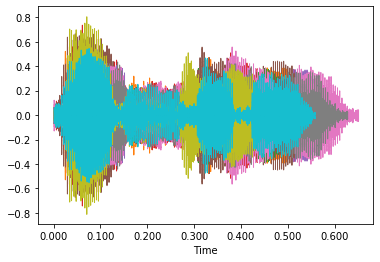

In [3]:
lastname_train_files = glob.glob(lastname_train_path + '*.wav')
lastname_trains = []

for path in lastname_train_files:
    y, sr = librosa.load(path, sr=11025,mono=True)
    y, index = librosa.effects.trim(y,top_db=10)
    librosa.display.waveshow(y)
    lastname_trains.append([y, sr])
    
train_size = len(lastname_trains)

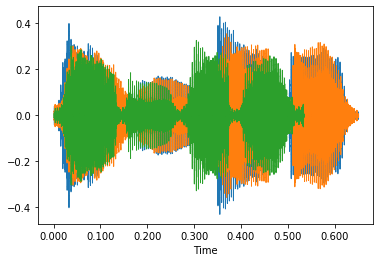

In [40]:
lastname_test_files = glob.glob(lastname_test_path + '*.wav')
lastname_tests = []

for path in lastname_test_files:
    y, sr = librosa.load(path, sr=11025,mono=True)
    y, index = librosa.effects.trim(y,top_db=10)
    librosa.display.waveshow(y)
    lastname_tests.append([y, sr])
    
test_size = len(lastname_tests)

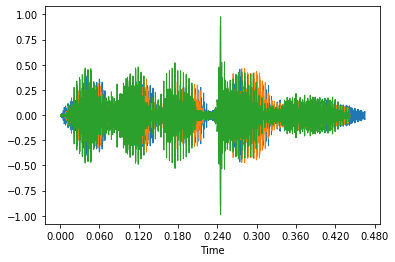

In [41]:
firstname_files = glob.glob(first_name_path + '*.wav')
firstnames = []

for path in firstname_files:
    y, sr = librosa.load(path, sr=11025,mono=True)
    y, index = librosa.effects.trim(y,top_db=10)
    librosa.display.waveshow(y)
    firstnames.append([y, sr])
    
firstname_size = len(firstnames)

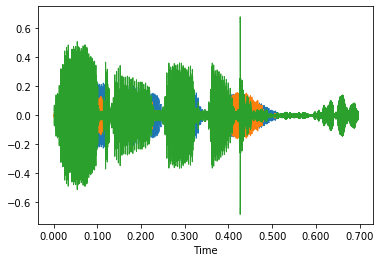

In [147]:
lastname_another_files = glob.glob(lastname_another_path + '*.wav')
lastname_anothers = []

for path in lastname_another_files:
    y, sr = librosa.load(path, sr=11025,mono=True)
    y, index = librosa.effects.trim(y,top_db=10)
    librosa.display.waveshow(y)
    lastname_anothers.append([y, sr])
    
lastname_another_size = len(lastname_anothers)

<div dir="rtl">

در اولین مرحله فاصله ی نام های خانوادگی را با یکدیگر در حالت خام می سنجیم. برای این کار از  تابع `librosa.sequence.dtw` استفاده میکنیم. خروجی این تابع شامل دو آرایه (یکی ماتریس هزینه و دیگری ماتریس مسیر بهینه) می باشد. کمترین فاصله در آخرین سطر و ستون ماتریس هزینه قرار دارد.

</div>

In [52]:

distances_lastname_lastname = np.zeros((train_size, train_size))
for i in range(train_size):
    for j in range(i+1, train_size):
        x_1, fs = lastname_trains[i]
        x_2, fs = lastname_trains[j]
        D, wp = librosa.sequence.dtw(x_1, x_2)
        best_cost = D[-1, -1]
        distances_lastname_lastname[i][j] = round(best_cost, 3)


<div dir="rtl">

نتیجه را در جدول زیر مشاهده می نمایید. 

</div>

In [53]:
labels = [str(i) for i in range(train_size)]
pretty_table = PrettyTable([''] + labels)
for i in range(train_size):
    pretty_table.add_row([i]+ distances_lastname_lastname[i,:].tolist())
print(pretty_table.get_string())

+---+-----+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|   |  0  |    1    |    2    |    3    |    4    |    5    |    6    |    7    |    8    |    9    |
+---+-----+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0 | 0.0 | 362.079 |  285.01 | 346.856 | 338.453 | 418.572 | 479.444 | 328.333 | 339.433 | 306.194 |
| 1 | 0.0 |   0.0   | 292.001 | 334.531 | 280.369 | 343.209 | 365.764 | 317.607 | 366.611 |  274.61 |
| 2 | 0.0 |   0.0   |   0.0   | 330.453 |  305.4  | 360.345 | 433.734 | 302.903 | 276.518 | 256.093 |
| 3 | 0.0 |   0.0   |   0.0   |   0.0   | 309.842 | 322.802 | 348.941 | 311.924 | 385.655 | 326.122 |
| 4 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   | 333.417 | 332.407 | 267.814 | 381.062 | 286.046 |
| 5 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   | 394.436 | 387.106 | 366.614 | 346.852 |
| 6 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   | 316.297 | 

<div dir="rtl">

حال در ادامه فاصله نام خانوداگی و نام را در حالت داده خام با همان الگوریتم بررسی میکنیم.

</div>

In [163]:
distances_firstname_lastname = np.zeros((train_size, firstname_size))
for i in range(train_size):
    for j in range(firstname_size):
        x_1, fs = lastname_trains[i]
        x_2, fs = firstnames[j]
        D, wp = librosa.sequence.dtw(x_1, x_2)
        best_cost = D[-1, -1]
        distances_firstname_lastname[i][j] = round(best_cost, 3)

<div dir="rtl">

همانطور که مشاهده می شود به طور میانگین اختلاف نام با نام خانوادگی بیشتر از دو نمونه از نام خانوادگی می باشد. اما آنچنان تمایز قابل توجهی ایجاد نمی کند.
</div>


In [164]:
labels = [str(i) for i in range(firstname_size)]
pretty_table = PrettyTable([''] + labels)
for i in range(train_size):
    pretty_table.add_row([i]+ distances_firstname_lastname[i,:].tolist())
print(pretty_table.get_string())

+---+---------+---------+---------+
|   |    0    |    1    |    2    |
+---+---------+---------+---------+
| 0 | 362.137 | 400.997 | 406.274 |
| 1 | 460.296 | 475.236 | 467.854 |
| 2 | 405.668 | 431.357 | 435.792 |
| 3 | 495.076 | 506.675 | 490.857 |
| 4 |  450.59 | 463.808 | 479.196 |
| 5 |  597.7  | 603.347 | 562.326 |
| 6 | 551.504 | 551.316 | 553.147 |
| 7 | 418.793 |  434.91 | 451.157 |
| 8 | 470.139 | 487.566 | 467.337 |
| 9 | 423.306 | 448.694 | 429.574 |
+---+---------+---------+---------+


<div dir="rtl">

در آخرین پردازش با داده های خام، نام خانوادگی های ضبط شده توسط دو گوینده متفاوت را با یکدیگر مقایسه می کنیم.

</div>


In [155]:
distances_firstname_lastname_lastname_another = np.zeros((train_size, lastname_another_size))
for i in range(train_size):
    for j in range(lastname_another_size):
        x_1, fs = lastname_trains[i]
        x_2, fs = lastname_anothers[j]
        D, wp = librosa.sequence.dtw(x_1, x_2)
        best_cost = D[-1, -1]
        distances_firstname_lastname_lastname_another[i][j] = round(best_cost, 3)

<div dir="rtl">

نتیجه نشان از بیشتر بودن فاصله نمونه ها نسبت به حالتی که فقط یک گوینده داشتیم، دارد.

</div>

In [156]:
labels = [str(i) for i in range(lastname_another_size)]
pretty_table = PrettyTable([''] + labels)
for i in range(train_size):
    pretty_table.add_row([i]+ distances_firstname_lastname_lastname_another[i,:].tolist())
print(pretty_table.get_string())

+---+---------+---------+---------+
|   |    0    |    1    |    2    |
+---+---------+---------+---------+
| 0 | 336.635 |  400.75 |  370.68 |
| 1 | 481.834 | 551.255 | 448.792 |
| 2 | 416.754 | 474.771 | 377.543 |
| 3 |  543.15 | 634.567 | 446.498 |
| 4 |  465.13 | 531.959 | 459.695 |
| 5 | 645.091 | 728.822 |  496.89 |
| 6 | 606.269 | 701.109 | 528.129 |
| 7 | 410.444 | 487.915 | 436.848 |
| 8 |  482.91 |  550.82 | 391.545 |
| 9 | 438.855 | 513.495 |  401.01 |
+---+---------+---------+---------+


<div dir="rtl">

بدیهی است که در حوزه پردازش گفتار، از داده های خام هیچ الگو و قاعده ای را نمی توان شناسایی نمود. استخراج ویژگی امری اجتناب ناپذیر است. در ادامه دو پیش پردازش انجام می شود. یکی تبدیل هر نمونه به فریم هایی با طول برابر و دارای همپوشانی و دیگری استخراج ویژگی از هر یک از آن فریم ها می باشد.

برای استخراج ویژگی موارد زیر در نظر گرفته شده است:

* 13 ضریب اول MFCC

* مشتق ویژگی اول (شامل 13 عدد)

* مشتق مرتبه دوم ویژگی اول (شامل 13 عدد)

* نرخ عبور از صفر

* انرژی سیگنال

در مجموع هر نمونه ما از تعداد متفاوتی فریم و هر فریم دقیقا از 41 ویژگی تشکیل میشود. برای محاسبه وِیژگی های ذکر شده از توابع `librosa.feature.mfcc`، `librosa.feature.zero_crossing_rate` و ` librosa.feature.rms` استفاده شده است. سایز هر پنجره 50 میلی ثانیه و همپوشانی 10 میلی ثانیه در نظر گرفته شده است. در ادامه همه داده ها و نمونه های خام را به وِیژگی های فوق تبدیل می کنیم:
</div>

## hop: _number of bits between two succesive window_

## n_ftt: _number of bits in one frame_

## overlap: _nftt - hop_

In [7]:
frame_length = int(0.05*sr)
hop_length = int(0.04*sr)
lastname_trains_features = []
for y, fs in lastname_trains:
    mfcc = librosa.feature.mfcc(y, fs, n_mfcc=13, hop_length=hop_length, n_fft=frame_length, window=get_window('hamming',frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(y,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(y,frame_length=frame_length,hop_length=hop_length)
    features = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    lastname_trains_features.append(features)


<div dir="rtl">

# نرمال سازی

نکته مهم بعد از استخراج وِیژگی در تمامی سیستم های یادگیری ماشین و شناسایی الگو، هم مقیاس کردن تمامی ویژگی ها می باشد. برای این مورد ما از نورمال سازی رایج میانگین-واریانس استفاده کرده ایم. 

</div>

$$ x^{norm} = \frac{x - mean}{stdev} $$ 

In [8]:
def cmvn(vecs, variance_normalization=False):
    """ This function is aimed to perform global cepstral mean and
        variance normalization (CMVN) on input feature vector "vec".
        The code assumes that there is one observation per row.
    Args:
        vecs  (list[array]): list of input feature matrises
            (array size:(num_features,num_observation))
        variance_normalization (bool): If the variance
            normilization should be performed or not.
    Return:
          array: The mean(or mean+variance) normalized feature vector.
    """

    # concarinate all matrises to one
    temp_vec = np.concatenate(vecs, axis=1)

    eps = 2**-30
    rows, cols = temp_vec.shape

    # Mean calculation
    mean = np.mean(temp_vec, axis=1, keepdims=True)
    mean_vec = np.tile(mean, (1, cols))

    norm_vecs = []
    # Variance normalization
    if variance_normalization:
        # Mean subtraction
        mean_subtracted = temp_vec - mean_vec
        stdev = np.std(mean_subtracted, axis=1, keepdims=True)

        for item in vecs:
            norm_vecs.append(
                (item - np.tile(mean, (1, item.shape[1]))) / (np.tile(stdev, (1, item.shape[1])) + eps))

    else:
        for item in vecs:
            norm_vecs.append(
                (item - np.tile(mean, (1, item.shape[1]))))

    return norm_vecs


In [9]:
normalized_lastname_trains_features = cmvn(lastname_trains_features, True)

<div dir="rtl">

طیف ضرایب MFCC و مشتق مرتبه اول و دوم آن را برای یکی از نمونه ها پس از نورمال سازی مشاهده میکنید.
</div>

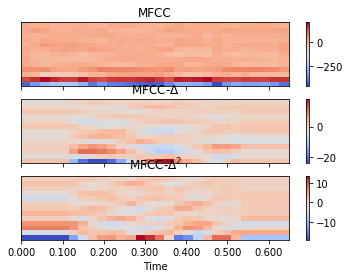

In [10]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img1 = librosa.display.specshow(mfcc, ax=ax[0], x_axis='time')
ax[0].set(title='MFCC')
ax[0].label_outer()
img2 = librosa.display.specshow(mfcc_delta, ax=ax[1], x_axis='time')
ax[1].set(title=r'MFCC-$\Delta$')
ax[1].label_outer()
img3 = librosa.display.specshow(mfcc_delta2, ax=ax[2], x_axis='time')
ax[2].set(title=r'MFCC-$\Delta^2$')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
fig.colorbar(img3, ax=[ax[2]])

<div dir="rtl">

در ادامه ویژگی های دیگر داده هایمان را  استخراج شده و آن ها را نورمال میکنیم.

</div>

In [70]:
frame_length = int(0.05*sr)
hop_length = int(0.04*sr)
lastname_tests_features = []
for y, fs in lastname_tests:
    mfcc = librosa.feature.mfcc(y, fs, n_mfcc=13, hop_length=hop_length, n_fft=frame_length, window=get_window('hamming',frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(y,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(y,frame_length=frame_length,hop_length=hop_length)
    features = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    lastname_tests_features.append(features)

In [71]:
frame_length = int(0.05*sr)
hop_length = int(0.04*sr)
firstname_features = []
for y, fs in firstnames:
    mfcc = librosa.feature.mfcc(y, fs, n_mfcc=13, hop_length=hop_length, n_fft=frame_length, window=get_window('hamming',frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(y,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(y,frame_length=frame_length,hop_length=hop_length)
    features = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    firstname_features.append(features)

In [72]:
normalized_firstnames_features = cmvn(firstname_features,True)

In [73]:

distances_with_features_lastname = np.zeros((train_size, train_size))
for i in range(train_size):
    for j in range(i+1, train_size):
        x_1 = normalized_lastname_trains_features[i]
        x_2 = normalized_lastname_trains_features[j]
        D, wp = librosa.sequence.dtw(x_1, x_2)
        best_cost = D[-1, -1]
        distances_with_features_lastname[i][j] = round(best_cost, 3)


In [145]:
frame_length = int(0.05*sr)
hop_length = int(0.04*sr)
lastname_another_features = []
for y, fs in lastname_anothers:
    mfcc = librosa.feature.mfcc(y, fs, n_mfcc=13, hop_length=hop_length, n_fft=frame_length, window=get_window('hamming',frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(y,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(y,frame_length=frame_length,hop_length=hop_length)
    features = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    lastname_another_features.append(features)

In [146]:
normalized_lastname_another_features = cmvn(lastname_another_features,True)

+---+-----+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|   |  0  |    1    |    2    |    3    |    4    |    5    |    6    |    7    |    8    |    9    |
+---+-----+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0 | 0.0 | 180.924 | 137.502 | 141.066 | 175.856 |  148.02 |  186.84 | 169.114 | 172.871 | 162.052 |
| 1 | 0.0 |   0.0   | 142.995 | 172.745 | 152.051 | 143.468 | 164.853 | 156.218 |  165.29 | 140.204 |
| 2 | 0.0 |   0.0   |   0.0   | 137.175 | 141.992 | 126.719 | 167.706 | 160.458 | 130.575 | 125.739 |
| 3 | 0.0 |   0.0   |   0.0   |   0.0   | 155.472 | 144.386 | 152.998 | 146.428 | 171.451 | 157.715 |
| 4 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |  144.08 | 135.552 | 131.027 | 170.491 |  146.05 |
| 5 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   | 158.272 | 151.321 | 142.445 | 138.324 |
| 6 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   | 125.931 | 

<div dir="rtl">

حال همه ی فاصله هایی که در داده های خام محاسبه کردیم را دوباره برای داده های با ویژگی نورمال شده تکرار میکنیم.

فاصله ده نام خانوادگی آموزشی:

</div>

In [89]:
labels = [str(i) for i in range(train_size)]
pretty_table = PrettyTable([''] + labels)
for i in range(train_size):
    pretty_table.add_row([i]+ distances_with_features_lastname[i,:].tolist())
print(pretty_table.get_string())

+---+-----+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|   |  0  |    1    |    2    |    3    |    4    |    5    |    6    |    7    |    8    |    9    |
+---+-----+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0 | 0.0 | 180.924 | 137.502 | 141.066 | 175.856 |  148.02 |  186.84 | 169.114 | 172.871 | 162.052 |
| 1 | 0.0 |   0.0   | 142.995 | 172.745 | 152.051 | 143.468 | 164.853 | 156.218 |  165.29 | 140.204 |
| 2 | 0.0 |   0.0   |   0.0   | 137.175 | 141.992 | 126.719 | 167.706 | 160.458 | 130.575 | 125.739 |
| 3 | 0.0 |   0.0   |   0.0   |   0.0   | 155.472 | 144.386 | 152.998 | 146.428 | 171.451 | 157.715 |
| 4 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |  144.08 | 135.552 | 131.027 | 170.491 |  146.05 |
| 5 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   | 158.272 | 151.321 | 142.445 | 138.324 |
| 6 | 0.0 |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   |   0.0   | 125.931 | 

In [78]:
labels = [str(i) for i in range(firstname_size)]
pretty_table = PrettyTable([''] + labels)
for i in range(train_size):
    pretty_table.add_row([i]+ distances_with_features_firstname_lastname[i,:].tolist())
print(pretty_table.get_string())

<div dir="rtl">

فاصله ده نام خانوادگی آموزشی با نام ها:

</div>

In [90]:
X = np.concatenate([np.transpose(item) for item in normalized_lastname_trains_features])
n_components = 5
lengths = np.array([item.shape[1] for item in normalized_lastname_trains_features])
hmm_model = hmm.GaussianHMM(
    n_components=n_components, covariance_type="full", n_iter=100)
hmm_model.fit(X,lengths)


+---+---------+---------+---------+
|   |    0    |    1    |    2    |
+---+---------+---------+---------+
| 0 | 247.887 |  242.55 | 246.219 |
| 1 | 263.637 | 266.646 | 259.557 |
| 2 |  239.03 | 237.599 | 235.467 |
| 3 | 254.367 | 250.646 | 246.967 |
| 4 |  259.72 | 259.826 | 258.732 |
| 5 | 238.676 |  239.32 | 237.603 |
| 6 | 276.008 | 279.783 | 277.591 |
| 7 | 256.789 | 255.418 | 255.486 |
| 8 | 209.354 | 209.033 |  201.57 |
| 9 | 229.366 | 230.135 | 223.854 |
+---+---------+---------+---------+


In [157]:
distances_with_features_firstname_lastname_lastname_another = np.zeros((train_size, lastname_another_size))
for i in range(train_size):
    for j in range(lastname_another_size):
        x_1 = normalized_lastname_trains_features[i]
        x_2 = normalized_lastname_another_features[j]
        D, wp = librosa.sequence.dtw(x_1, x_2)
        best_cost = D[-1, -1]
        distances_with_features_firstname_lastname_lastname_another[i][j] = round(best_cost, 3)

<div dir="rtl">

فاصله ده نام خانوادگی آموزشی با نام خانوادگی ضبط شده توسط گوینده ای دیگر:

</div>

In [158]:
labels = [str(i) for i in range(lastname_another_size)]
pretty_table = PrettyTable([''] + labels)
for i in range(train_size):
    pretty_table.add_row([i]+ distances_with_features_firstname_lastname_lastname_another[i,:].tolist())
print(pretty_table.get_string())

+---+---------+---------+---------+
|   |    0    |    1    |    2    |
+---+---------+---------+---------+
| 0 | 200.608 | 196.946 | 284.247 |
| 1 |  189.37 | 179.002 | 286.719 |
| 2 | 165.718 | 164.351 | 259.797 |
| 3 | 199.396 | 193.922 | 300.305 |
| 4 | 198.447 | 182.123 | 290.444 |
| 5 | 182.289 | 178.708 |  263.52 |
| 6 | 214.277 | 206.636 | 307.177 |
| 7 | 198.828 |  181.19 | 290.781 |
| 8 | 173.561 | 160.685 | 246.003 |
| 9 | 162.802 | 165.214 |  255.95 |
+---+---------+---------+---------+


<div dir="rtl">

## تحلیل سه جدول فوق

اگر میانگین و واریانس سه جدول را مقایسه کنیم در میابیم که فواصل به اینگونه می باشد:

`نام خانوداگی توسط یک گوینده` *<* `نام خانوادگی توسط دو گوینده` *<* `نام و نام خانوداگی`

پیشرفت قابل توجه نسبت به فاصله نمونه ها در حالت خام. همچنین اختلاف اعداد درون هر جدول از میانگین بسیار کم تر شده و اعداد به یکدیگر نزدیک هستند.

</div>

<div dir="rtl">

 # <center> آموزش با مدل مخفی مارکو (HMM)  </center>


یکی ا ز مدل های رایج برای بررسی پدیده های گفتاری استفاده از مدل های مخفی مارکو می باشد. این مدل ها از نظریات احتمالات و آمار برای بررسی رفتار و مشاهدات متوالی استفاده میکنند. از آنجایی که گفتار هم یک نوع داده متوالی حاصل از یک سیستم مخفی (مجرای گفتار انسان) است می توان از آن استفاده نمود. در پایتون کتابخانه ی `hmmlearn` را برای این منظور به کار میبریم.

مدل ما از 5 جز (state) تشکیل شده است و از 10 فایل نام خانوادگی برای آموزش آن استفاده میکنیم.
</div>

In [159]:
for item in normalized_lastname_trains_features:
    print(hmm_model.score(np.transpose(item)))

GaussianHMM(covariance_type='full', n_components=5, n_iter=100)

<div dir="rtl">

لازم به ذکر است که برای ارزیابی و میزان مطابفت مشاهدات جدید با مدل آموزش دیده از تابع `score` استفاده میکنیم که خروجی آن احتمال لگاریتمی در بازه ی زیر می باشد:

</div>

$$ (-\infty, 0]  $$

<div dir="rtl">

هر میزان که مقدار آن به صفر نزدیک تر باشد احتمال نیز بیشتر است. [اطلاعات بیشتر](https://en.wikipedia.org/wiki/Log_probability)

ابتدا میزان تطابق را برای همان داده هایی که مدل با آن آموزش دیده است محاسبه میکنیم. 
</div>

In [61]:
normalized_lastname_tests_features = cmvn(lastname_tests_features,True)

<div dir="rtl">

برای نام خانوادگی تست (گوینده یکسان با داده های آموزشی)

</div>

In [48]:
for item in normalized_lastname_tests_features:
    print(hmm_model.score(np.transpose(item)))

-5053.7475584087015
-7255.334544822906
-4537.286386583172


<div dir="rtl">

برای نام ها

</div>

In [49]:
for item in normalized_firstnames_features:
    print(hmm_model.score(np.transpose(item)))

-6512.018373262616
-7061.515468930111
-6273.59090235505


<div dir="rtl">

برای نام خانوادگی توسط گوینده ای دیگر

</div>

In [160]:
for item in normalized_lastname_another_features:
    print(hmm_model.score(np.transpose(item)))

-6147.747596445928
-5765.352023834199
-10327.419936321585


<div dir="rtl">

در تحلیل نتایج فوق می توان گفت که که مدل ما از مشکل `underfitting` رنج می برد که برای آموزش چنین مدل پیچیده ای صرفا با ده داده طبیعی به نظر میرسد. 
میزان احتمال برای نام خانوادگی تست و نام تمایزی را ایجاد نمیکند. برای حل مشکل فوق یک راه حل جمع آوری و افزودن داده بیشتر در مرحله آموزش است. تنوع در مجموعه داده نیز بسیار مهم است. وقتی کارایی سیستم افزایش پیدا میکند که گفتار های ما در محیط های مختلف، با انواع میکروفن، با گوینده های مختلف و .... جمع آوری شده باشد. این کار مفید اما زمان بر ، وقت گیر و پر هزینه است. به جای آن ما در اینجا از تکینیک دیگر به نام `data augmentation` استفاده نموده ایم. با استفاده از این تکنیک سعی میکنیم با همان مجموعه داده ی محدودی که در اختیار داریم، تعداد و تنوع مورد نظرمان را ایجاد نماییم. 

افزونگی هایی که در اینجا انتخاب شده به شرح زیر است:

- **نویز گوسی:** به صورت تصادفی و بر اساس توزیع نورمال مقادیر داده ها را تغییر میدهد. این افزونگی فارق از ماهیت داده عمل میکند.
- **کشش زمانی:** داده را به صورت زمانی کشیده یا فشرده میکنیم. نکته مهم در این افزونگی آن است که میزان فرکانس نمونه برداری را تغییر نمیدهد.
- **ClippingDistortion:** بعضی نقاط کمتر یا بیشتر از یک حد آستانه تصادفی بر اساس توزیع یکنواخت را حذف می نماید.
- **افزودن پس زمینه:** افزودن صداهای محیط های مختلف مانند یک مهمانی ، خیابان ، باران و ... به پس زمینه داده های آموزشی .
- **Gain:** تغییر بلندی و حجم صدا به صورت تصادفی.
- **PolarityInversion:** داده های ما نسبت به محور افقی برعکس میشوند. مانند اینکه در 1- ضرب شوند. این افزونگی در صدایی که ما می شنویم تغییری ایجاد نمیکند.

برای اعمال این افزونگی ها از کتابخانه ی `audiomentations` استفاده میکنیم. هر یک از این موارد با احتمال 50 درصد ممکن است بر روی نمونه ها انجام شود یا نشود. 
با این کار 10 داده ی آموزشی خود را به 100 نمونه تبدیل میکنیم. 
برای صدا های پس زمینه از مجموعه داده [freesound](https://annotator.freesound.org/fsd/explore/%252Fm%252F093_4n/) بهره برده ایم.

</div>

In [112]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    ClippingDistortion(p=0.5),
    AddBackgroundNoise(sounds_path="background_noises/",p=0.5),
    Gain(p=0.5),
    PolarityInversion(p=0.5),
])

In [ ]:
aug_samples = []
aut_path = "aug_trains/"
for i in range(10):
    j = 0
    for y, sr in lastname_trains:
        aug_sample = augment(
            samples=y, sample_rate=sr)
        aug_samples.append([aug_sample,sr])
        soundfile.write(aut_path + "augmented_" + str(i) + "_" + str(j) + '.wav', aug_sample, samplerate=sr)

In [117]:
frame_length = int(0.05*sr)
hop_length = int(0.04*sr)
lastname_augs_features = []
for y, fs in aug_samples:
    mfcc = librosa.feature.mfcc(y, fs, n_mfcc=13, hop_length=hop_length, n_fft=frame_length, window=get_window('hamming',frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(y,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(y,frame_length=frame_length,hop_length=hop_length)
    features = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    lastname_augs_features.append(features)


In [118]:
normalized_lastname_augs_features = cmvn(lastname_augs_features, True)

<div dir="rtl">

مدل مخفی مارکو را با داده های جدید حاصل از تکنیک افزونگی به علاوه داده اصلی آموزش میدهیم. سپس  مجددا میزان تطابق آن را با داده های تست خود میسنجیم.

</div>

In [161]:
X = np.concatenate([np.transpose(item) for item in (
    normalized_lastname_trains_features+lastname_augs_features)])
n_components = 5
lengths = np.array([item.shape[1]
                    for item in normalized_lastname_trains_features])
hmm_model = hmm.GaussianHMM(
    n_components=n_components, covariance_type="full", n_iter=100)
hmm_model.fit(X, lengths)


GaussianHMM(covariance_type='full', n_components=5, n_iter=100)

<div dir="rtl">

برای نام خانوادگی تست (توسط گوینده یکسان با داده های آموزشی)

</div>

In [121]:
for item in normalized_lastname_tests_features:
    print(hmm_model.score(np.transpose(item)))

-1962.4293289260004
-2155.4162309995477
-1553.391706658723


<div dir="rtl">

برای نام ها

</div>

In [123]:
for item in normalized_firstnames_features:
    print(hmm_model.score(np.transpose(item)))

-2373.971003380662
-2445.445270637625
-2270.2056591256874


<div dir="rtl">

برای نام خانوادگی توسط گوینده ای دیگر

</div>

In [165]:
for item in normalized_lastname_another_features:
    print(hmm_model.score(np.transpose(item)))

-2095.3757821248487
-1915.3024090532247
-3633.244364656579


<div dir="rtl">

تحلیل داده های بالا به سادگی قابل انجام است. مشاهده میکنیم که برای داده های تست نام خانوادگی با گوینده یکسان کاملا اعداد بهبود پیدا کرده و با اعداد به دست آمده از نام قابل تمایز است. همچنین برای داده نام خانوادگی توسط گوینده دیگر نیز بهبود مشاهده می شود و قابل قبول است چون ما در یک هیچ یک از افزونگی هایی که ایجاد کردیم تغییر صدای گوینده را نداشتیم. با جمع آوری داده از افراد مختلف مطمئنا بهبود آن به شکل چشم گیری خواهد بود.

## <center> با تشکر از توجه شما </center>
</div>